Wall time: 328 ms


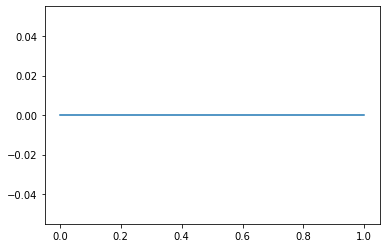

In [17]:
%%time

from rbm import ising
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

filename = 'Runs\\sarsa-rbm-frozenlake-run1.pkl'

Ssize=7 #needed for minimum binary representation of the state (max - 64)
Msize=3
nhidden = 20
size=nhidden+Ssize+Msize  #30 - 0.0027

I = ising(size,Ssize,Msize)
I.initialise_wiring()

# RL
total_episodes = 1000   #10000
max_steps = 100         # in Otsuka they are 250 but it's a different task
Beta = np.linspace(0,15,total_episodes)

I.SarsaLearning(total_episodes, max_steps, Beta)

# Params to save
params = {}
params['Ssize']= Ssize
params['Msize']= Msize
params['nhidden'] = nhidden
params['size'] = size
params['total_episodes'] = total_episodes
params['max_steps'] = max_steps
params['Beta'] = Beta
params['network_J'] = I.J
params['network_h'] = I.h
params['network_rewards'] = I.rewards


# Save
if not os.path.isfile(filename):
    with open(filename, 'wb') as output:
            pickle.dump(params, output, pickle.HIGHEST_PROTOCOL)
else:
    print("File already exists!")

# Output
# I.env.render()
plt.plot(I.rewards)

In [18]:
# # file_load = 'Run results\\criticality_run_newnarma.pkl'

# with open(filename, 'rb') as input:
#     run = pickle.load(input)

# run  

{'Ssize': 7,
 'Msize': 3,
 'nhidden': 20,
 'size': 30,
 'total_episodes': 2,
 'max_steps': 5,
 'Beta': array([ 0., 15.]),
 'network_J': array([[-2.58939600e-01, -1.50040792e-01, -2.68299059e-02,
          9.34817378e-02, -7.15999636e-02, -9.92001119e-02,
          1.29277977e-02,  3.97918804e-02,  5.72554158e-03,
         -4.32696183e-02,  1.01480518e-01,  9.10402922e-02,
         -9.25192857e-02,  1.02313696e-02, -1.26884507e-01,
         -5.86814559e-02,  1.00696318e-01, -6.70227520e-02,
         -7.80642761e-02, -1.12938654e-01, -1.62880838e-02,
          1.08373731e-02, -1.16268683e-01,  2.13812174e-01,
          4.57922519e-03,  1.30045407e-01, -5.81400039e-02,
          1.03796926e-01,  1.13074698e-01, -2.60496070e-02],
        [-7.04905917e-02,  5.13342131e-02, -5.11509160e-02,
          1.27328665e-01, -2.90235718e-02, -2.58594349e-02,
         -9.71520208e-02,  3.56099643e-02, -1.00822927e-01,
         -3.98753624e-02, -1.73906723e-01, -8.75471947e-02,
         -5.14615519e-02